In [24]:
import pandas as pd
import matplotlib.pyplot as plt

import mplhep as hep
hep.style.use(hep.style.ATLAS)

from performance.utils import clean_pandas_df

IN_DIR = "data/main_traccc/"
IN_FILE = "1insts_4gpus/gpu_1instance_sync.csv"
OUT_DIR = "data/main_traccc_nom/"

data = pd.read_csv(IN_DIR + IN_FILE)
data = clean_pandas_df(data)
data

,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,...,gpu_memory_1_GB,gpu_memory_2_GB,gpu_memory_3_GB,gpu_total_memory_0_GB,gpu_total_memory_1_GB,gpu_total_memory_2_GB,gpu_total_memory_3_GB,total_gpu_usage,max_gpu_memory,percent_gpu_memory
0,1,4.92770,5,295,57,12,202283,119,1,180275,...,4.035969,4.035969,4.035969,42.949673,42.949673,42.949673,42.949673,43.38889,4.035969,9.396973
1,2,9.71086,6,279,35,9,205662,91,2,203200,...,4.035969,4.035969,4.035969,42.949673,42.949673,42.949673,42.949673,82.57900,4.044358,9.416504
2,3,13.37750,5,284,29,9,223729,95,1,221095,...,4.044358,4.044358,4.044358,42.949673,42.949673,42.949673,42.949673,98.42100,4.044358,9.416504
6,4,16.33290,5,292,17,7,244262,93,1,243872,...,4.044358,4.044358,4.044358,42.949673,42.949673,42.949673,42.949673,128.26320,4.044358,9.416504
3,5,15.78850,5,300,62888,7,253257,108,1,252512,...,4.044358,4.035969,4.044358,42.949673,42.949673,42.949673,42.949673,133.00000,4.044358,9.416504
5,6,16.24960,6,308,122630,7,246034,108,2,447192,...,4.044358,4.044358,4.044358,42.949673,42.949673,42.949673,42.949673,131.57900,4.044358,9.416504
4,7,16.22180,6,331,184507,8,246503,102,2,477618,...,4.044358,4.044358,4.044358,42.949673,42.949673,42.949673,42.949673,132.36840,4.044358,9.416504


In [25]:
data_1gpu = pd.read_csv(IN_DIR + "1insts_1gpus/gpu_1instance_sync.csv")
data_1gpu = clean_pandas_df(data_1gpu)
data_1gpu

,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,...,gpu_memory_1_GB,gpu_memory_2_GB,gpu_memory_3_GB,gpu_total_memory_0_GB,gpu_total_memory_1_GB,gpu_total_memory_2_GB,gpu_total_memory_3_GB,total_gpu_usage,max_gpu_memory,percent_gpu_memory
0,1,5.98135,7,298,18,6,166299,92,2,164239,...,0.504365,0.504365,4.044358,42.949673,42.949673,42.949673,42.949673,48.1818,4.044358,9.416504
1,2,5.99986,6,310,165990,6,166885,93,2,329241,...,0.504365,0.504365,4.044358,42.949673,42.949673,42.949673,42.949673,51.6364,4.044358,9.416504
3,3,6.05538,5,352,329437,6,165086,93,2,492328,...,0.504365,0.504365,4.044358,42.949673,42.949673,42.949673,42.949673,46.8182,4.044358,9.416504
5,4,6.06466,5,351,493186,6,164666,93,2,655404,...,0.504365,0.504365,4.035969,42.949673,42.949673,42.949673,42.949673,49.0000,4.035969,9.396973
4,5,6.06465,5,313,657989,6,164751,94,2,819635,...,0.504365,0.504365,4.035969,42.949673,42.949673,42.949673,42.949673,48.2727,4.035969,9.396973
6,6,6.09245,5,326,818900,6,164036,94,2,981789,...,0.504365,0.504365,4.044358,42.949673,42.949673,42.949673,42.949673,46.6364,4.044358,9.416504
2,7,6.02764,6,335,995600,6,165881,95,2,1156097,...,0.504365,0.504365,4.044358,42.949673,42.949673,42.949673,42.949673,48.0909,4.044358,9.416504


## Plot throughput vs concurrent requets

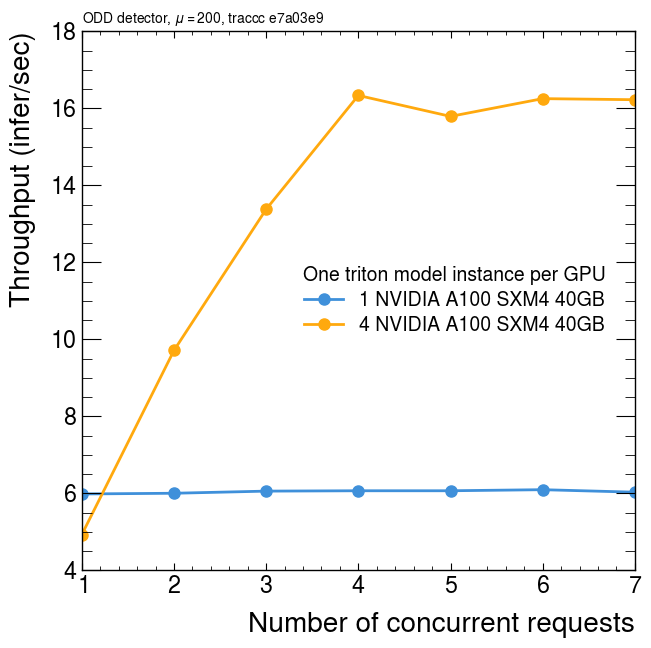

In [26]:
plt.figure(figsize=(7, 7))
plt.plot(data_1gpu['Concurrency'].values, data_1gpu['Inferences/Second'].values, 'o-', label='1 NVIDIA A100 SXM4 40GB')
plt.plot(data['Concurrency'].values, data['Inferences/Second'].values, 'o-', label='4 NVIDIA A100 SXM4 40GB')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('Throughput (infer/sec)', loc='top')
plt.title(r'ODD detector, $\mu = 200$, traccc e7a03e9', fontsize=10, loc='left')
plt.legend(title='One triton model instance per GPU')

plt.savefig(f'{OUT_DIR}/concurrency_vs_throughput_1inst.pdf', bbox_inches='tight')
plt.show()

## Plot GPU utilization per GPU

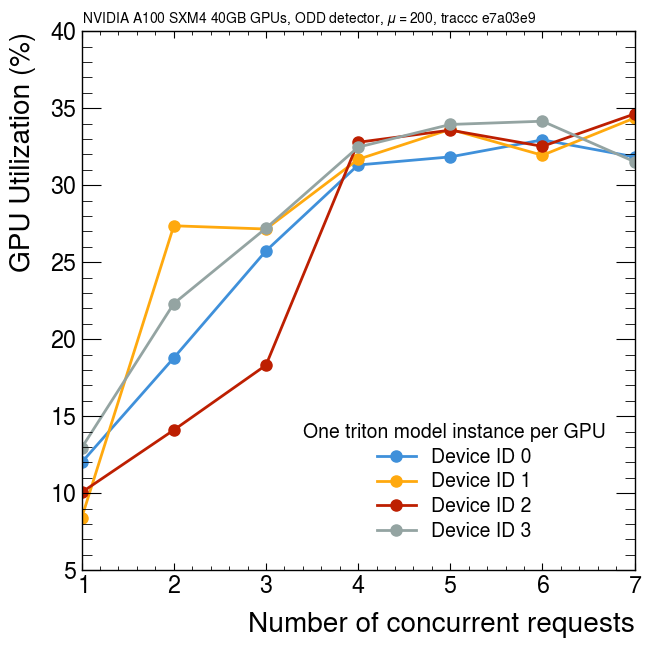

In [27]:
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.plot(data['Concurrency'].values, data[f'gpu_util_{i}'].values, 'o-', label=f'Device ID {i}')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('GPU Utilization (%)', loc='top')
plt.title(r'NVIDIA A100 SXM4 40GB GPUs, ODD detector, $\mu = 200$, traccc e7a03e9', fontsize=10, loc='left')
plt.legend(title='One triton model instance per GPU')

plt.savefig(f'{OUT_DIR}/concurrency_vs_gpu_util_1inst.pdf', bbox_inches='tight')
plt.show()